<center>
<h1>CSC-343 ARTIFICIAL INTELLIGENCE</h1>
<h1>PROGRAMMING ASSIGNMENT 10</h1>
<h1>BACK PROPAGATION</h1>
</center>

<br/>
<hr/>
<br/>

<center>

<a href="https://www.quantamagazine.org/brain-bursts-can-mimic-famous-ai-learning-strategy-20211018/"><img width="80%" style="float:left" src="https://d2r55xnwy6nx47.cloudfront.net/uploads/2021/10/branbackprop_2880x1620_lede.jpg"></a> 

<center>

<br/>
<hr/>
<br/>

## Imports

In [37]:
import pandas as pd 
import numpy  as np 
from matplotlib import pyplot as plt 
from tqdm import tqdm 
%matplotlib inline

## Reading Data

In [38]:
data  = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/uscities.csv', index_col='city')

In [39]:
# river = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc343/main/data/savannah.csv', index_col = 0)
# river = river[280:-70]

data  = data[data['state_name'].apply(lambda x: x in ['Georgia', 'South Carolina', 'North Carolina'])]
data  = data[~data.index.duplicated(keep='last')]

X     = data[['lng', 'lat']]
y     = (data['state_name'] == 'South Carolina').astype(int)

## Plotting Data

In [40]:
def plot_data(X, y, title):

  fig = plt.figure(figsize=(50, 20))

  ga, sc = X[y==0], X[y==1]

  for X_state, color in [(ga, "red"), (sc, "blue")]:

    plt.scatter(X_state['lng'], X_state['lat'], c=color, s=70, figure=fig)

    [plt.annotate(X_state.index[i],\
        (X_state.iloc[i]['lng'], X_state.iloc[i]['lat']), \
        fontsize=10) \
      for i in range(len(X_state.index))]

  plt.title(title, fontsize=30);
  plt.grid()

In [41]:
# plot_data(X, y, title='Click to zoom')

# # plt.plot(river['0'], river['1'], linewidth=20, color='lightblue')

# plt.legend(['Georgia and North Carolina (y=0)', 'South Carolina (y=1)'], fontsize=50, markerscale=4);

# Normalize data

In [42]:
X = X.apply(lambda x: (x-x.mean()) / x.std())
# X[0] = 1  #Done in the methods of Neural Network now

<br/>
<hr/>
<br/>

## Question 1. 

Write a function that takes <u>**randomly**</u>  **splits** the data into **75% training** set and **25% test** set. 


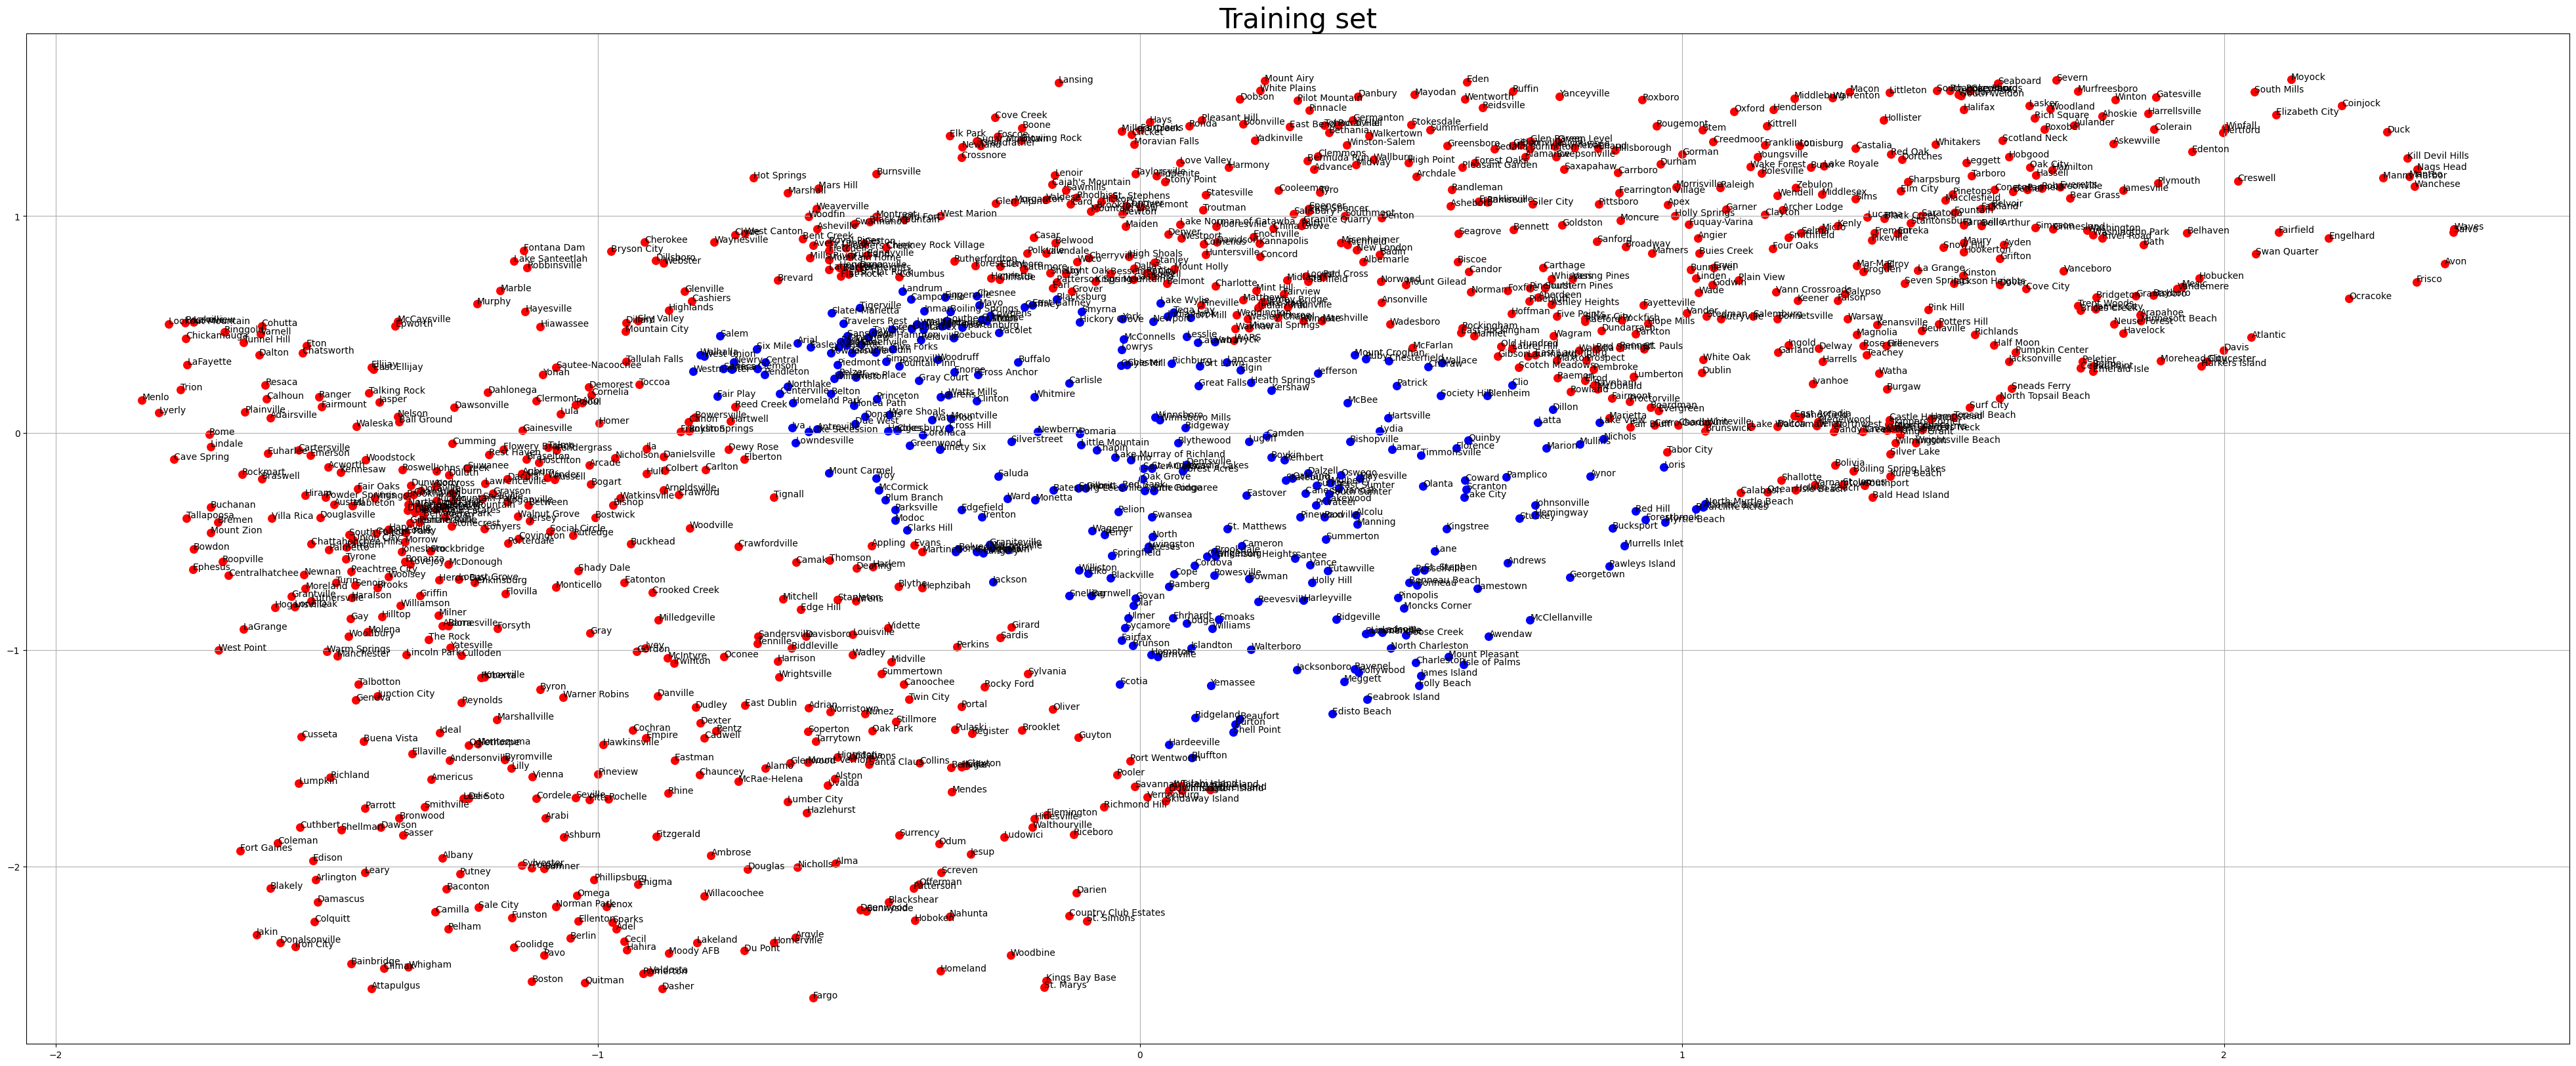

<Figure size 640x480 with 0 Axes>

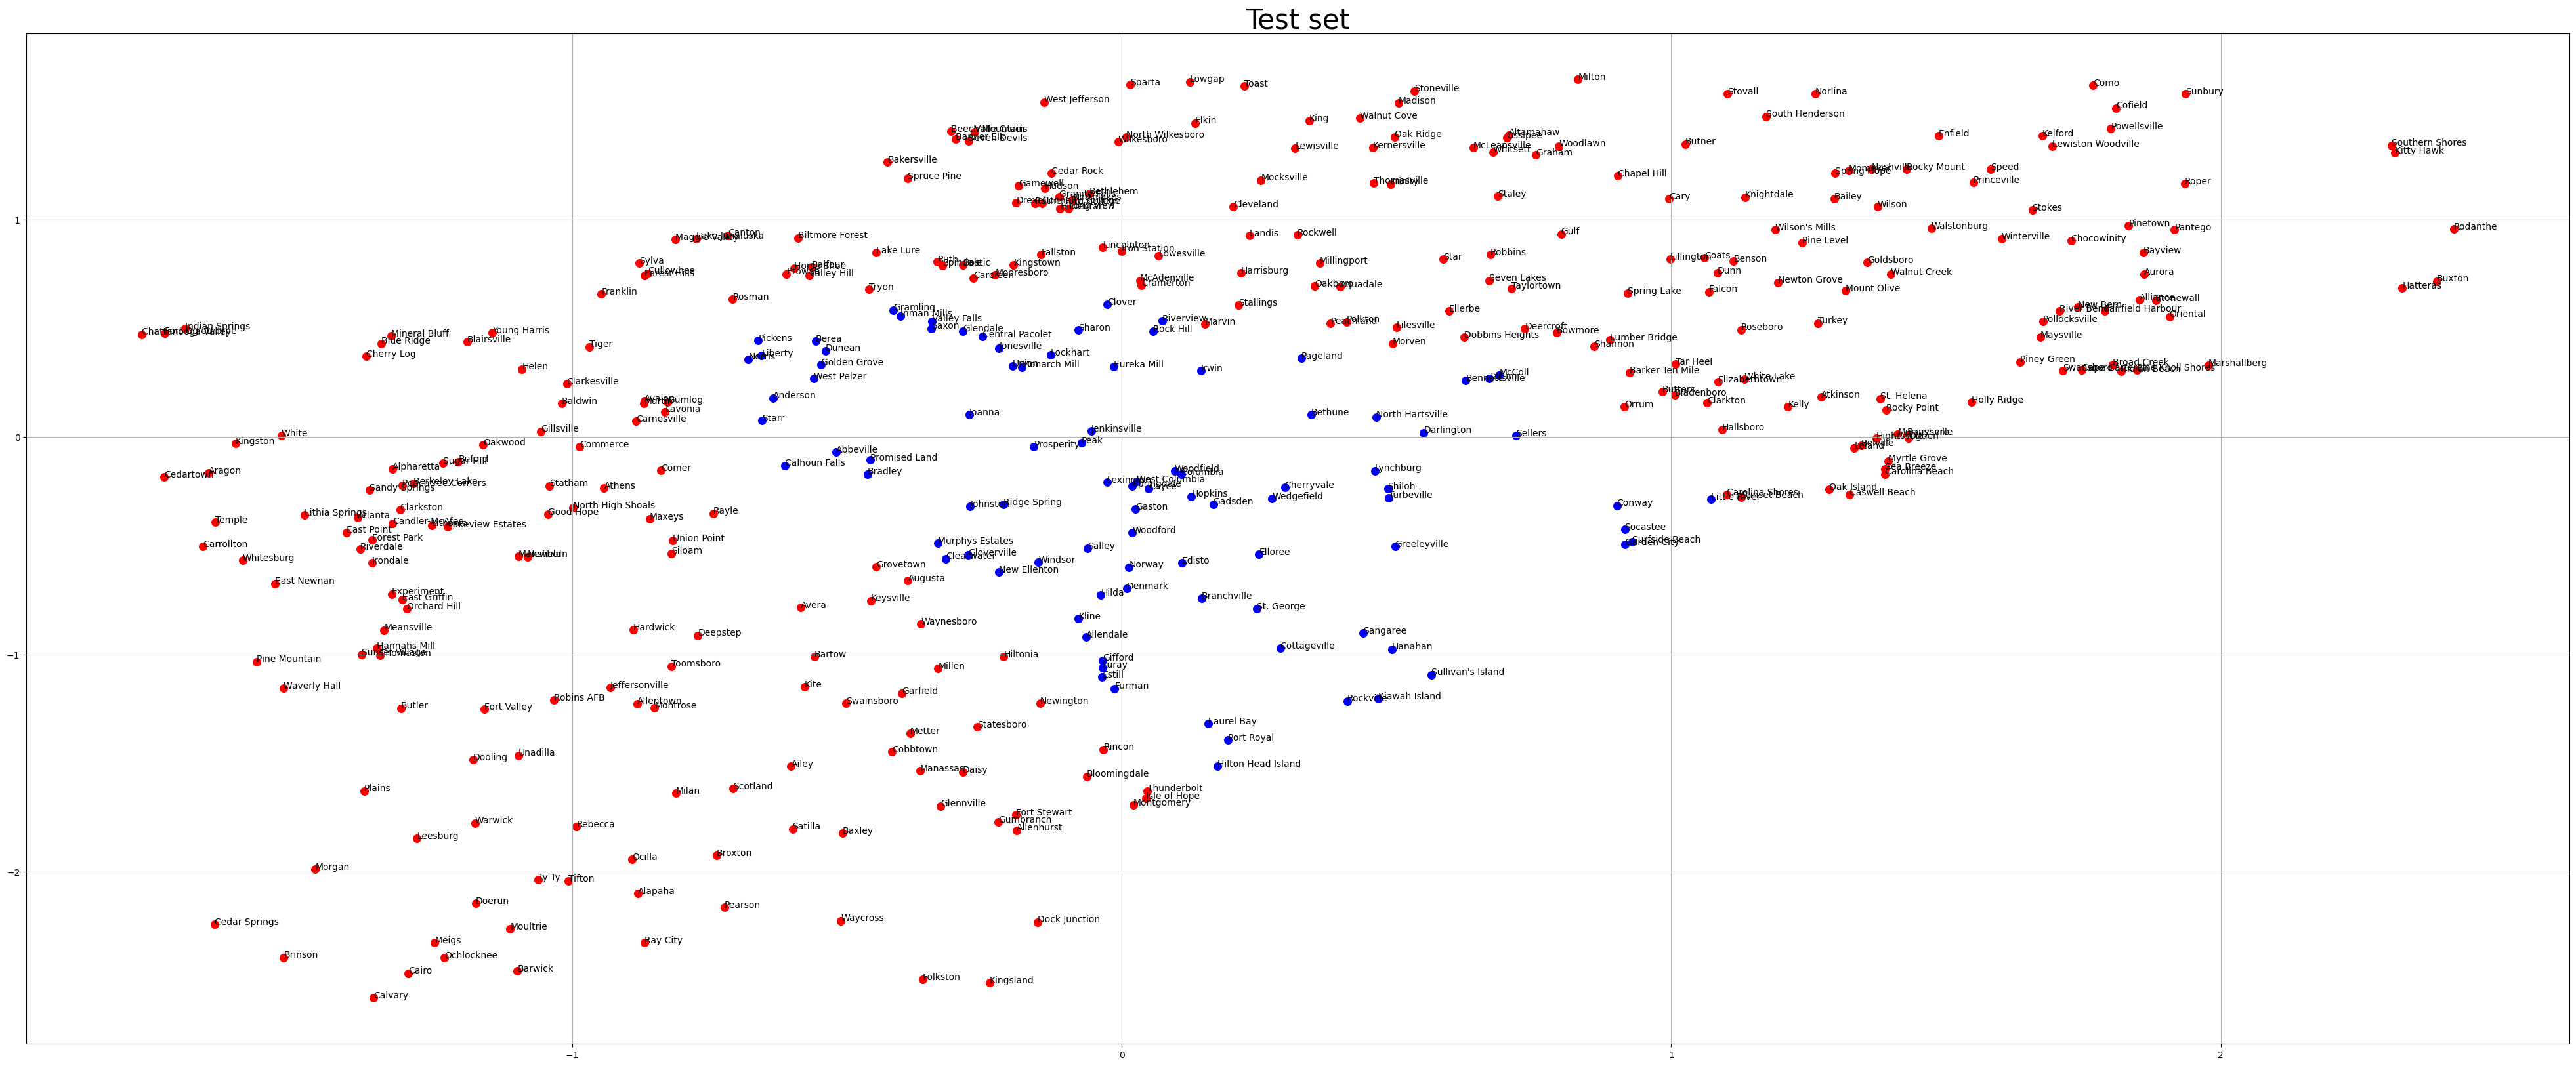

In [43]:
train_cities = list(set(X.sample(frac=0.75).index))
test_cities  = list(set(X.index).difference(train_cities))

X_train, y_train = X.loc[train_cities], y.loc[train_cities]
X_test,  y_test  = X.loc[test_cities],  y.loc[test_cities]

plot_data(X_train, y_train, "Training set");
plt.figure();
plot_data(X_test, y_test, "Test set");

<br/>
<hr/>
<br/>

In [44]:
y.value_counts()

0    1239
1     394
Name: state_name, dtype: int64

# Question 2. 

Implement the **Backpropagation** algorithm to learn a complex decision boundary that decides if a given city is in South Carolina or not. 

<br/>

<b>Use as many hidden layers as you like. Each of your hidden layers can have any number of neurons. </b>

<br/>
<!-- <img width="80%" src="https://raw.githubusercontent.com/fahadsultan/csc343/main/assets/imgs/backprop_2layers.png"> -->
<!-- 
Your code should take as **inputs**: 

1. Data $~(\mathbf{X}$, $\mathbf{y}$)

  * where $\mathbf{X}_i$ represents (Longitude, Latitude) of $i^{th}$ city
  * $\mathbf{y}_i$ is $1$ if state of $i^{th}$ city is South Carolina and $0$ otherwise

2. Learning rate $~\alpha$
3. Max iterations $~\text{epoch}$

and returns as **output**: 

* A matrix of weights $\mathbf{W}$ of dimensions ($\text{epoch} \times 3) $ where value $\mathbf{W}_{i, j}$ represents weight $w_j$ at epoch $i$.

    * That is, `len(weights) == epoch` _and_ `len(weights[0]) == 3`
\  -->

ONLY USE <u>TRAIN SET</u> FOR LEARNING! 

100%|██████████| 100000/100000 [00:05<00:00, 17923.74it/s]


Accuracy:  0.9509803921568627


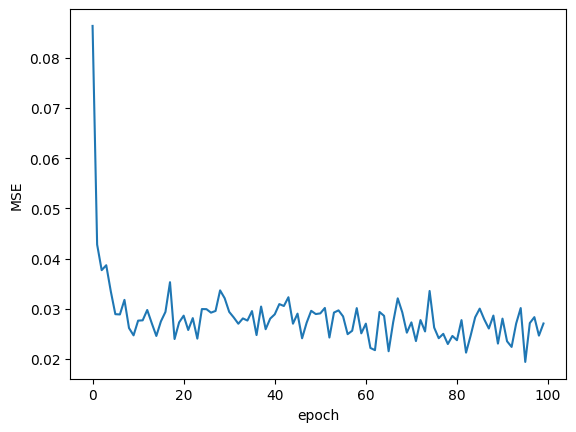

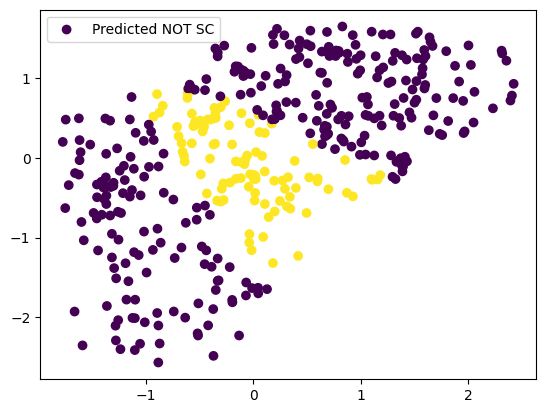

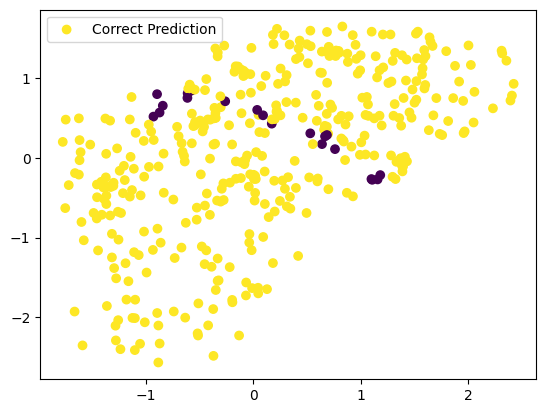

In [45]:
from numpy.random import random, randint

def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1.0 - x**2

class NeuralNetwork:

    def __init__(self, layers):
        
        self.activation_func = tanh
        self.activation_deriv = tanh_deriv

        self.weights = []
        for i in range(1, len(layers) - 1):
            r = random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        r = 2 * random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def backprop(self, X, y, learning_rate=0.2, epochs=100000):

        ones = np.atleast_2d(np.ones(X.shape[0])) 
        X = np.concatenate((ones.T, X), axis=1)    #Appending bias: all 1s for x_0

        errors = []
        Ws = []
         
        for k in tqdm(range(epochs)):
            i = randint(X.shape[0])      #Stochastic 
            activs = [X[i]]

            for l in range(len(self.weights)):
              dot_value = np.dot(activs[l], self.weights[l])
              activ = self.activation_func(dot_value)
              activs.append(activ)

            error = y[i] - activs[-1]
            deltas = [error * self.activation_deriv(activs[-1])]

            for l in range(len(activs) - 2, 0, -1): 
              deltas.append(deltas[-1].dot(self.weights[l].T) * \
                            self.activation_deriv(activs[l]))

            deltas.reverse()

            for i in range(len(self.weights)):
              layer = np.atleast_2d(activs[i])
              delta = np.atleast_2d(deltas[i])
              self.weights[i] += learning_rate * np.dot(layer.T, delta)
              Ws.append(self.weights)
            
            errors.append(error[0]**2)
        
        return errors, Ws

    def forward(self, x): 
        a = np.concatenate((np.ones(1).T, np.array(x)))      
        for l in range(0, len(self.weights)):
            a = self.activation_func(np.dot(a, self.weights[l]))
        return a


nn = NeuralNetwork([2,2, 1])
train_cities = list(set(X.sample(frac=0.75).index))
test_cities  = list(set(X.index).difference(train_cities))

X_train, y_train = X.loc[train_cities], y.loc[train_cities]
X_test,  y_test  = X.loc[test_cities],  y.loc[test_cities]
errors, Ws = nn.backprop(X_train, y_train)

preds = X_test.apply(nn.forward, axis=1)
preds = preds.apply(lambda x: round(x[0]))

print("Accuracy: ", sum(preds == y_test)/len(y_test))

err = [np.mean(errors[i*1000: (i+1)*1000]) for i in range(int(len(errors)/1000))];
plt.plot(err);
plt.xlabel('epoch');
plt.ylabel('MSE');

plt.figure();
plt.scatter(X_test['lng'], X_test['lat'], c=preds);
plt.legend(['Predicted NOT SC', 'not SC']);

plt.figure();
plt.scatter(X_test['lng'], X_test['lat'], c=preds==y_test);
plt.legend(['Correct Prediction']);

<br/>
<hr/>
<br/>

In [46]:
preds.value_counts()

0    308
1    100
dtype: int64

In [47]:
Ws[-1]

[array([[-4.0822881 , -0.71802373,  1.47992951],
        [-6.74209531, -4.42482483, -2.67814186],
        [-3.42852365, -2.34650111, -4.133248  ]]),
 array([[-1.30310879],
        [-0.7033572 ],
        [ 1.97497088]])]

100%|██████████| 100000/100000 [00:05<00:00, 18025.77it/s]


In [53]:
Ws[-1]

[array([[ 2.32212698,  0.97542417, -0.52367824],
        [-1.55083665, -2.51376301, -0.48078192],
        [-1.55693202, -2.49509898, -0.44872438]]),
 array([[ 2.5169597 ],
        [-2.60641421],
        [ 1.06415199]])]

<hr/>

# Question 3. Plot weights

Plot the evolution of weights during the learning process

100%|██████████| 200000/200000 [00:04<00:00, 44054.26it/s]


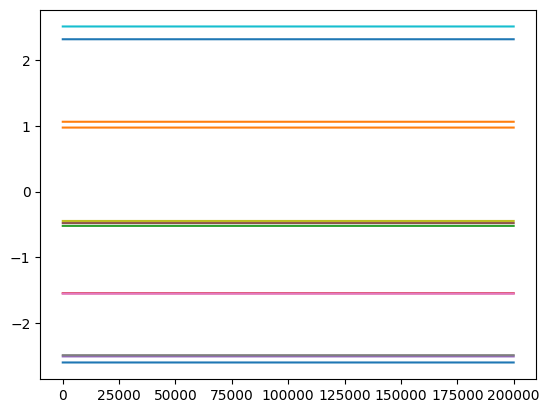

In [56]:
Weights = []
for t in tqdm(range(len(Ws))):
  w = []
  for layer in range(len(Ws[t])):
    for node in range(len(Ws[t][layer])):
      for w_i in range(len(Ws[t][layer][node])):
        w.append(Ws[t][layer][node][w_i])
  Weights.append(w.copy())

plt.plot(Weights);

<br/>
<hr/>
<br/>

# Question 4. 

Compute Precision, Recall, F1-score for the <b><u>Training Data</u></b>

\

1. Precision 
$$ \text{precision} = \frac{TP}{TP+FP}$$

2. Recall
$$ \text{recall} = \frac{TP}{TP+FN}$$
3. F1-score 
$$ \text{F$_1$} = 2 \cdot \frac{precision \cdot recall}{precision+recall}$$

In [51]:
prediction = X_train.apply(nn.forward, axis = 1)
prediction = prediction.apply(lambda x: round(x[0]))

comparison = pd.DataFrame()
comparison['y_hat'] = prediction
comparison['y'] = y_train

TP = ((comparison['y'] == 1) & (comparison['y_hat'] == 1)).sum()
FP = ((comparison['y'] == 0) & (comparison['y_hat'] == 1)).sum()
TN = ((comparison['y'] == 0) & (comparison['y_hat'] == 0)).sum()
FN = ((comparison['y'] == 1) & (comparison['y_hat'] == 0)).sum()

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * ((precision * recall) / (precision + recall))

print(precision, recall, f1_score)

0.1781115879828326 0.27666666666666667 0.21671018276762402


<br/>
<hr/>
<br/>

# Question 5. Compute score for test set

Evaluate your logistic regression model on the <u>**test set**</u> using the following evaluation metrics: 

1. Recall 
2. Precision 
3. F1-score 

In [52]:
comp = pd.DataFrame()
comp['y_hat'] = preds
comp['y'] = y_test

tp = ((comp['y'] == 1) & (comp['y_hat'] == 1)).sum()
fp = ((comp['y'] == 0) & (comp['y_hat'] == 1)).sum()
tn = ((comp['y'] == 0) & (comp['y_hat'] == 0)).sum()
fn = ((comp['y'] == 1) & (comp['y_hat'] == 0)).sum()

precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1_score  = 2 * (precision * recall) / (precision + recall)

print(precision, recall, f1_score)


nan nan nan


<ipython-input-52-5ce4abb3e5a0>:10: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
<ipython-input-52-5ce4abb3e5a0>:11: RuntimeWarning: invalid value encountered in long_scalars
  recall    = tp / (tp + fn)


<br/>
<hr/>
<br/>

<center><br/>

<a href="https://www.science.org/content/article/want-convince-someone-you-re-human-one-word-could-do-trick"><img width="50%" src="https://www.science.org/do/10.1126/science.aav4876/full/SS2862476-1280x720.jpg"></a>
 
</center>


<br/>
<hr/>
<br/>